In [1]:
# ---------- import
from cryspy.interactive import action

In [2]:
# ---------- backup
#action.backup()

In [3]:
# ---------- clean
action.clean(skip_yes=True)

In [4]:
# ---------- initial structure generation
action.initialize()

[2025-02-17 15:15:41,751][cryspy_init][INFO] 


Start CrySPY 1.4.0b5


[2025-02-17 15:15:41,752][cryspy_init][INFO] # ---------- Library version info
[2025-02-17 15:15:41,752][cryspy_init][INFO] pandas version: 2.2.1
[2025-02-17 15:15:41,753][cryspy_init][INFO] pymatgen version: 2024.3.1
[2025-02-17 15:15:41,753][cryspy_init][INFO] pyxtal version: 0.6.3
[2025-02-17 15:15:41,753][cryspy_init][INFO] # ---------- Read input file, cryspy.in
[2025-02-17 15:15:41,754][write_input][INFO] [basic]
[2025-02-17 15:15:41,755][write_input][INFO] algo = RS
[2025-02-17 15:15:41,755][write_input][INFO] calc_code = ASE
[2025-02-17 15:15:41,755][write_input][INFO] tot_struc = 100
[2025-02-17 15:15:41,755][write_input][INFO] nstage = 1
[2025-02-17 15:15:41,756][write_input][INFO] njob = 100
[2025-02-17 15:15:41,756][write_input][INFO] jobcmd = zsh
[2025-02-17 15:15:41,756][write_input][INFO] jobfile = job_cryspy
[2025-02-17 15:15:41,757][write_input][INFO] 
[2025-02-17 15:15:41,757][write_input][INFO] [s

In [5]:
!ls

CONTCAR                  NaCl.vasp                data
CrySPY_interactive.ipynb NaCl.vesta               sim_struc.vasp
Cu2Au2.vesta             ValleOganov.ipynb        soap.ipynb
Cu5Au2.cif               backup                   trash
Cu5Au2.vasp              calc_in                  umap copy.ipynb
Cu5Au2.vesta             cryspy.in                umap.ipynb
Cu5Au2.xyz               cryspy.stat


In [6]:
# ---------- structure optimization
from ase.calculators.emt import EMT
from chgnet.model import CHGNetCalculator
action.restart(njob=0, calc=CHGNetCalculator())

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on mps
[2025-02-17 15:15:45,333][cryspy_restart][INFO] 


Restart CrySPY 1.4.0b5


[2025-02-17 15:15:45,334][cryspy_restart][INFO] read input, cryspy.in


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# ---------- show result
action.show_rslt(cid='all')

    Spg_num   Spg_sym  Spg_num_opt Spg_sym_opt  E_eV_atom  Magmom      Opt
0       137  P4_2/nmc          137    P4_2/nmc  -3.511931     NaN  no_file
1       216     F-43m          227       Fd-3m  -2.937451     NaN  no_file
2        12      C2/m           12        C2/m  -3.667963     NaN  no_file
3        17    P222_1           17      P222_1  -3.569034     NaN  no_file
4       129    P4/nmm          129      P4/nmm  -3.585575     NaN  no_file
..      ...       ...          ...         ...        ...     ...      ...
95      123    P4/mmm          123      P4/mmm  -3.040383     NaN  no_file
96      227     Fd-3m          227       Fd-3m  -2.937421     NaN  no_file
97       98    I4_122           98      I4_122  -3.569742     NaN  no_file
98       78      P4_3           78        P4_3  -3.618210     NaN  no_file
99      123    P4/mmm          123      P4/mmm  -1.156280     NaN  no_file

[100 rows x 7 columns]


In [ ]:
# ---------- structure visualization
from ase.visualize import view
atoms = action.get_atoms('opt', cid=0)    # 'init' or 'opt'
#view(atoms)
#view(atoms, viewer='ngl')
view(atoms, viewer='x3d')

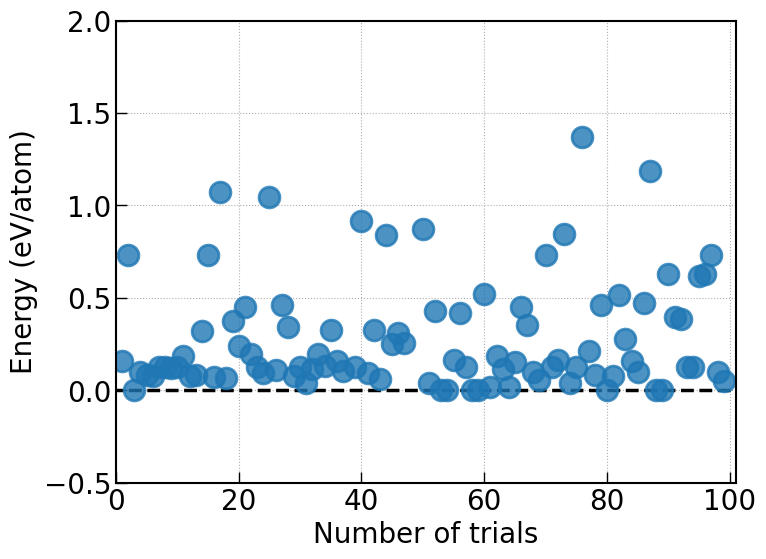

In [ ]:
#プロット
action.plot_e(y_max=2.0, y_min=-0.5)

In [ ]:
from ase.io import read
from pymatgen.io.ase import AseAtomsAdaptor
from chgnet.model import StructOptimizer

# ---------- User-supplied structure
add_str = read("NaCl.vasp")
struc = AseAtomsAdaptor.get_structure(add_str)
result = StructOptimizer().relax(atoms=struc, fmax=0.05, steps=1000)
add_e = result['trajectory'].energies[-1]/len(add_str)

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on mps
      Step     Time          Energy          fmax
FIRE:    0 15:40:25      -29.325581        0.123522
FIRE:    1 15:40:25      -29.326031        0.122266
FIRE:    2 15:40:26      -29.326923        0.119729
FIRE:    3 15:40:26      -29.328213        0.115889
FIRE:    4 15:40:26      -29.329857        0.110785
FIRE:    5 15:40:26      -29.331768        0.104499
FIRE:    6 15:40:26      -29.333872        0.096846
FIRE:    7 15:40:27      -29.336063        0.087234
FIRE:    8 15:40:27      -29.338436        0.073942
FIRE:    9 15:40:27      -29.340757        0.056526
FIRE:   10 15:40:27      -29.342615        0.031415


In [ ]:
from cryspy.interactive import action
from ase.visualize import view
from ase.io import write
# add_strをatomsでなくcifファイルとかに
# 構造IDで基準構造を指定できるように
# コサイン比類似度にして最も近いものを0にする
# ---------- Searching for Similar Structures of SOAP Descriptors Using Cosine Similarity
sim_struc = action.show_dist(n_max=4, l_max=2, add_str=add_str, add_e=add_e)
# sim_struc = action.show_dist(n_max=4, l_max=2)

write('sim_struc.vasp',sim_struc[2],format='vasp')
view(sim_struc[2], viewer='x3d')

species:['Na', 'Cl']
r_cut:6.0
n_max:4
l_max:2
      Cos_sim Spg_num   Spg_sym Spg_num_opt Spg_sym_opt E_eV_atom Magmom  \
100       1.0     NaN       NaN         NaN         NaN -3.667827    NaN   
53    0.99999    25.0      Pmm2        25.0        Pmm2 -3.667645    NaN   
57   0.999989    29.0    Pca2_1        29.0      Pca2_1 -3.667718    NaN   
52   0.999988     4.0      P2_1         4.0        P2_1 -3.667477    NaN   
58   0.999987    77.0      P4_2       101.0      P4_2cm -3.667621    NaN   
..        ...     ...       ...         ...         ...       ...    ...   
85   0.878186    46.0      Ima2        46.0        Ima2 -3.195126    NaN   
48    0.87441   189.0     P-62m       189.0       P-62m  6.948582    NaN   
99   0.761603   123.0    P4/mmm       123.0      P4/mmm  -1.15628    NaN   
94   0.671156   131.0  P4_2/mmc       131.0    P4_2/mmc -3.047822    NaN   
37   0.453409   105.0    P4_2mc       105.0      P4_2mc  5.769803    NaN   

         Opt  
100  no_file  
53   no_fi